# CB0494 Mini Project

#### Done by: Jaden Chua (U2220767J) and Ong Keng Yap (U2220617L)

## Problem Statement
Young couples in Singapore face the increasingly pertinent problem of finding suitable and affordable housing. With the supply of new BTO flats struggling to keep up with the ever-increasing demand, more and more couples have turned to the resale market in hopes of finding a new home [1].

We have chosen to follow the flat purchasing journey of a newly engaged couple, John and his fiance Jane. They have the following needs:
1. John and Jane are looking for a resale flat with the intention of long-term stay. They also plan to have children down the road, so they would prefer 4 or 5 room flats.
2. Jane would like them to stay near her parents who live in Bishan, in order to be eligible for the HDB proximity grant [2] to offset some cost of buying the flat.

As such, budget as well as type of flat (number of rooms) will be important factors in our analysis. This project aims to determine if a flat is worth buying by using a model to compare the predicted resale price to the actual resale price. If predicted resale price is higher than actual resale price, it is deemed worth it for couples to purchase that flat.

This project has 3 main parts:
### 1) Importing and cleaning of data
### 2) Overview of Data (Numerical and Categorical)
### 3) Machine Learning Techniques


Before we summarise our findings with our limitations, recommendations and conclusion.

[1]: https://www.straitstimes.com/business/property/some-younger-home-owners-prefer-hdb-resale-flats-that-offer-bigger-living-spaces-more-amenities#:~:text=Figures%20from%20HDB%20show%20that,in%202020%20and%202021%20respectively.
[2]: https://numberoneproperty.com/hdb-proximity-grant/#:~:text=The%20HDB%20Proximity%20Grant%20(PHG)%20is%20a%20one%2Dtime,flat%20near%20their%20parents%2Fchild.&text=The%20grant%20provides%20up%20to,amount%20varies%20based%20on%20proximity.

In [1]:
# Ignore warnings and import libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

## 1) Importing and cleaning of Data

The dataset we have chosen is Dataset 1: 'Resale Flat Price' from data.gov.sg

Source: https://data.gov.sg/dataset/resale-flat-prices

The dataset is named 'ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv'. We assign a variable csvfile to it, and import the data with the use of the read_csv function from Pandas. The first 10 rows of data is then displayed using the head function.

In [2]:
csvFile = 'ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv'
resaleData = pd.read_csv(csvFile)
resaleData.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
5,2017-01,ANG MO KIO,3 ROOM,150,ANG MO KIO AVE 5,01 TO 03,68.0,New Generation,1981,63 years,275000.0
6,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,61 years 06 months,280000.0
7,2017-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,04 TO 06,67.0,New Generation,1976,58 years 04 months,285000.0
8,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,61 years 06 months,285000.0
9,2017-01,ANG MO KIO,3 ROOM,571,ANG MO KIO AVE 3,01 TO 03,67.0,New Generation,1979,61 years 04 months,285000.0


In [3]:
x = resaleData.shape
x_dtype = type(resaleData)
print('Data information:\n')
print("Rows: \t\t", x[0])
print("Columns: \t", x[1])
print("Data type : ", x_dtype)

Data information:

Rows: 		 173681
Columns: 	 11
Data type :  <class 'pandas.core.frame.DataFrame'>


In [4]:
# Statistical summary
resaleData.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,173681.000000,173681.000000,1.736810e+05
mean,97.238057,1995.929140,4.935196e+05
std,24.022195,13.980456,1.708371e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1985.000000,3.680000e+05
50%,93.000000,1996.000000,4.630000e+05
75%,112.000000,2009.000000,5.880000e+05
max,249.000000,2022.000000,1.568888e+06


In [5]:
# Since dtype of remaining_lease is object, we write a function to convert remaining lease to months so we can use for analysis. 
def remaining_lease_to_months(lease):
    parts = lease.split(' ')
    years = int(parts[0])
    if len(parts) > 2:  # Check if there are both years and months
        months = int(parts[2])
    else:
        months = 0
    total_months = years * 12 + months
    return total_months

# Apply the function to the 'remaining_lease' column
resaleData['remaining_lease_months'] = resaleData['remaining_lease'].apply(remaining_lease_to_months)

# Drop the original 'remaining_lease' column
resaleData.drop(columns=['remaining_lease'], inplace=True)

In [6]:
resaleData.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease_months
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,232000.0,736
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,250000.0,727
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,262000.0,749
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,265000.0,745
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,265000.0,749


#### Omission of selected variables

We have decided to exclude the following variables which we deem irrelevant to the resale price prediction:
- `month`: we are predicting future price
- `block`: not indicative of resale price; can be seen as just a form of identification
- `street_name`: `town` accounts for this variable
- `lease_commence_date`: `remaining_lease_months` accounts for this variable

In [7]:
# Create new dataframe with extracted relevant information
useful_data = pd.DataFrame(resaleData[['town','flat_type','storey_range','floor_area_sqm','flat_model','resale_price','remaining_lease_months']])
useful_data.head()

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,remaining_lease_months
0,ANG MO KIO,2 ROOM,10 TO 12,44.0,Improved,232000.0,736
1,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,250000.0,727
2,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,262000.0,749
3,ANG MO KIO,3 ROOM,04 TO 06,68.0,New Generation,265000.0,745
4,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,265000.0,749


#### Separating numerical and categorical data

Before general data analysis is done, the variables in the cleaned dataframe `useful_data` is split into 2 separate dataframes: numerical and categorical.

In [8]:
# Extract numerical data from cleaned dataframe
numData = pd.DataFrame(useful_data[['floor_area_sqm','remaining_lease_months','resale_price']])
numData.describe()

,floor_area_sqm,remaining_lease_months,resale_price
count,173681.000000,173681.000000,1.736810e+05
mean,97.238057,895.971327,4.935196e+05
std,24.022195,166.696226,1.708371e+05
min,31.000000,501.000000,1.400000e+05
25%,82.000000,760.000000,3.680000e+05
50%,93.000000,895.000000,4.630000e+05
75%,112.000000,1058.000000,5.880000e+05
max,249.000000,1173.000000,1.568888e+06


In [9]:
catData = pd.DataFrame(useful_data[['town','flat_type','storey_range','flat_model']])
catData.describe()

,town,flat_type,storey_range,flat_model
count,173681,173681,173681,173681
unique,26,7,17,21
top,SENGKANG,4 ROOM,04 TO 06,Model A
freq,14482,73229,39950,60147


## 2) Overview of Data
### Numerical Data
This section provides an overview of the numeric variables through visualisation using plots. Observations are stated at the end of the numerical data visualisation.

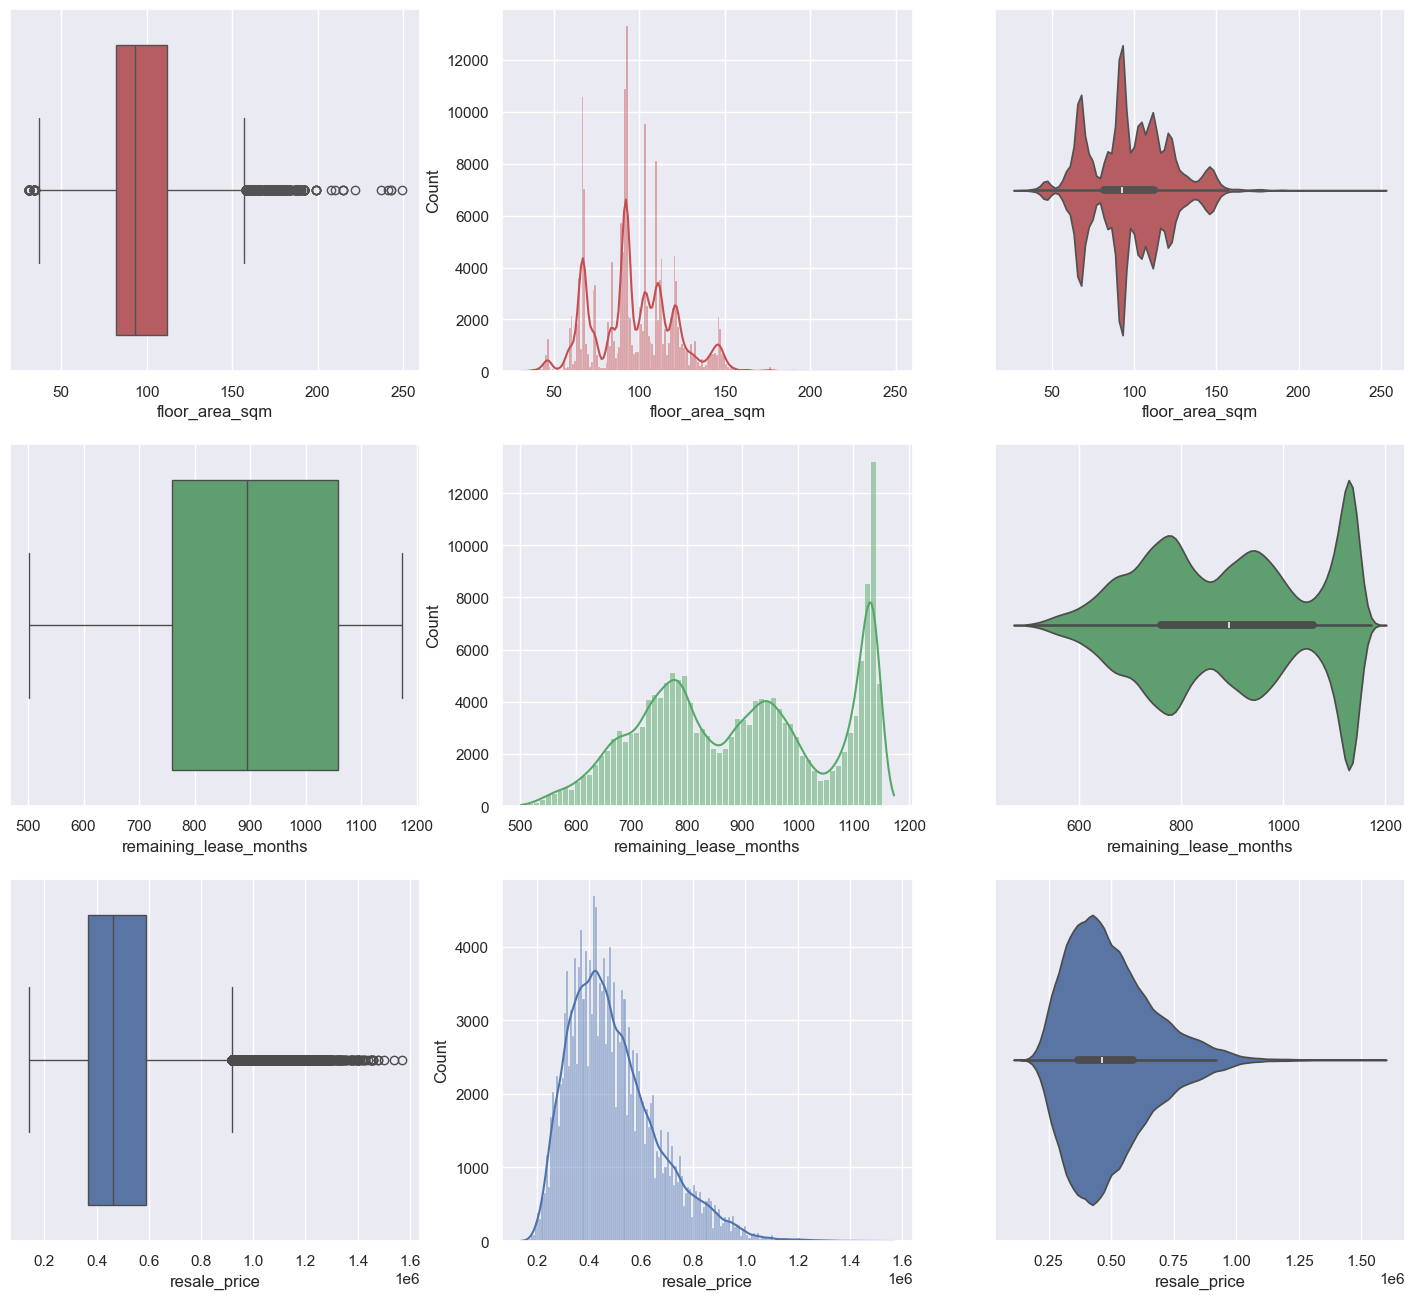

In [10]:
# Draw the distributions of all variables
f, axes = plt.subplots(3, 3, figsize=(18, 16))
colors = ['r', 'g', 'b']
count = 0

for var in numData:
    sb.boxplot(x = var, data = numData, color = colors[count], ax = axes[count,0])
    sb.histplot(x = var, data = numData, kde = True, color = colors[count], ax = axes[count,1])
    sb.violinplot(x = var, data = numData, color = colors[count], ax = axes[count,2])
    count += 1

                        floor_area_sqm  remaining_lease_months  resale_price
floor_area_sqm                1.000000                0.125360      0.602462
remaining_lease_months        0.125360                1.000000      0.325371
resale_price                  0.602462                0.325371      1.000000


<Axes: >

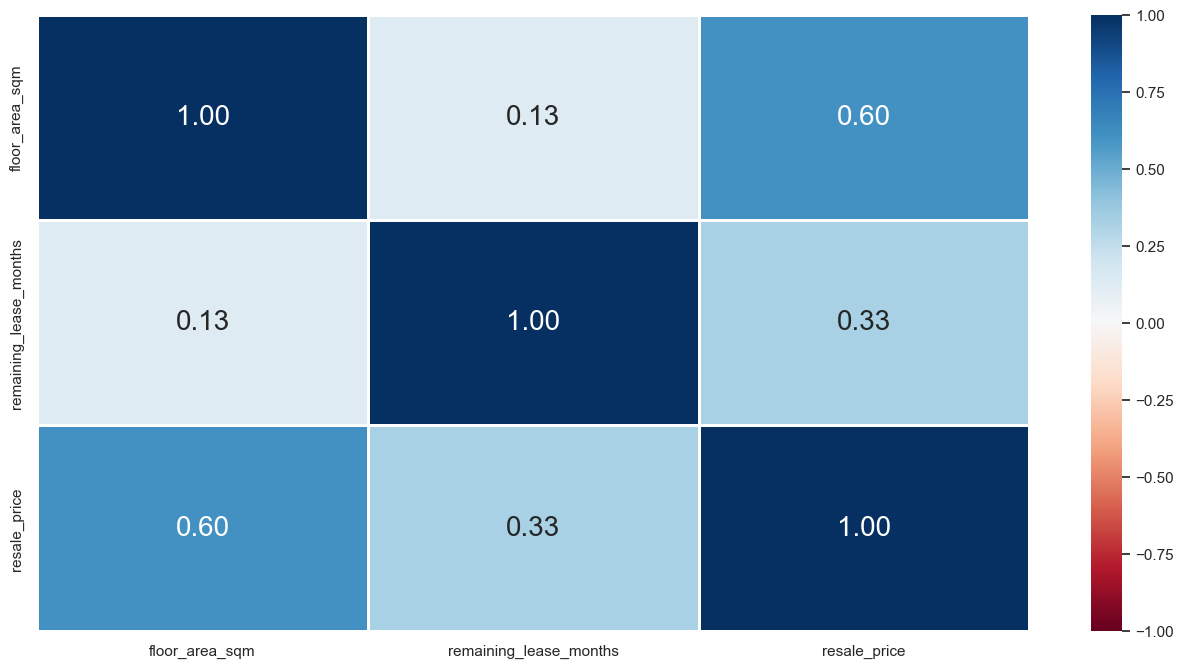

In [11]:
# Find correlation between numerical variables
CorrIndexScore = numData.corr()
print(CorrIndexScore)
plt.figure(figsize=(16,8))
sb.heatmap(CorrIndexScore, vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = '.2f', annot_kws = {'size':20}, cmap = 'RdBu')

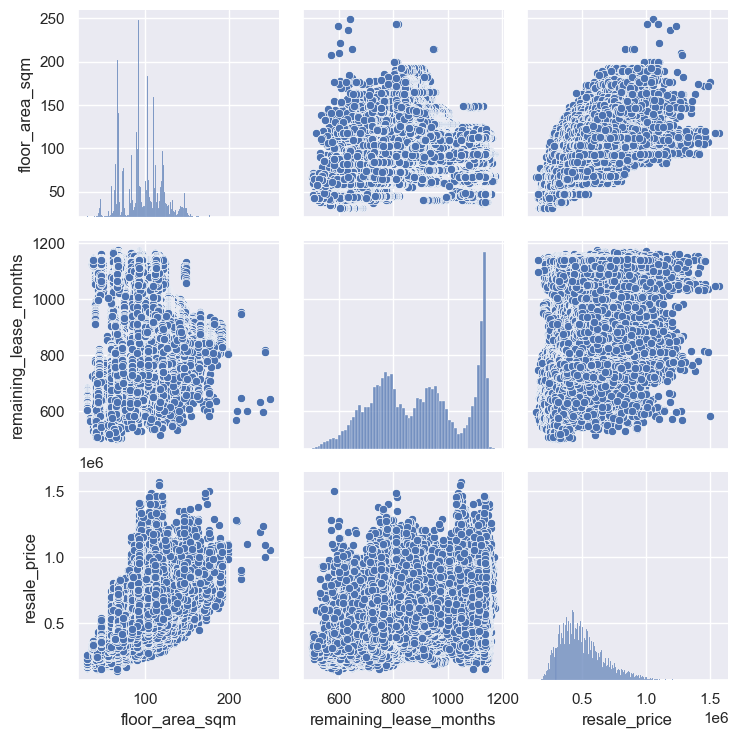

In [12]:
#Pairplot to visualise relationship between each numerical variable
sb.pairplot(data = numData)

### Observations
- With reference to the boxplots, `floor_area_sqm` and `resale_price` contain many outliers, while there are none in `remaining_lease_months`
- With reference to the histogram, the graph is right-skewed
- With reference to the heatmap, both `floor_area_sqm` and `remaining_lease_months` show a positive correlation with `resale_price`. However, `floor_area_sqm` has a stronger correlation with `resale_price` given its higher score of 0.60 compared to just 0.33 for `remaining_lease_months`.

### Categorical Data
This section provides an overview of the categorical variables through visualisation using plots. Again, observations are stated at the end of the categorical data visualisation.

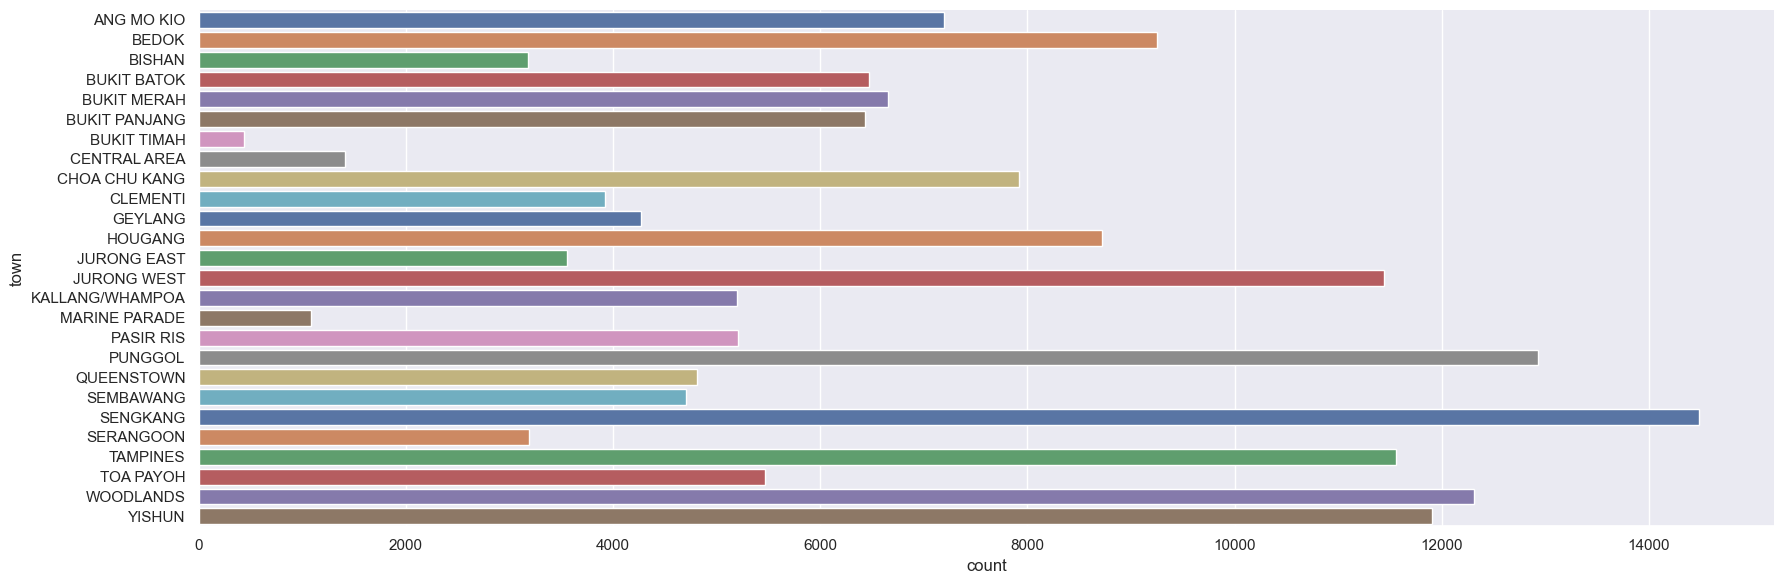

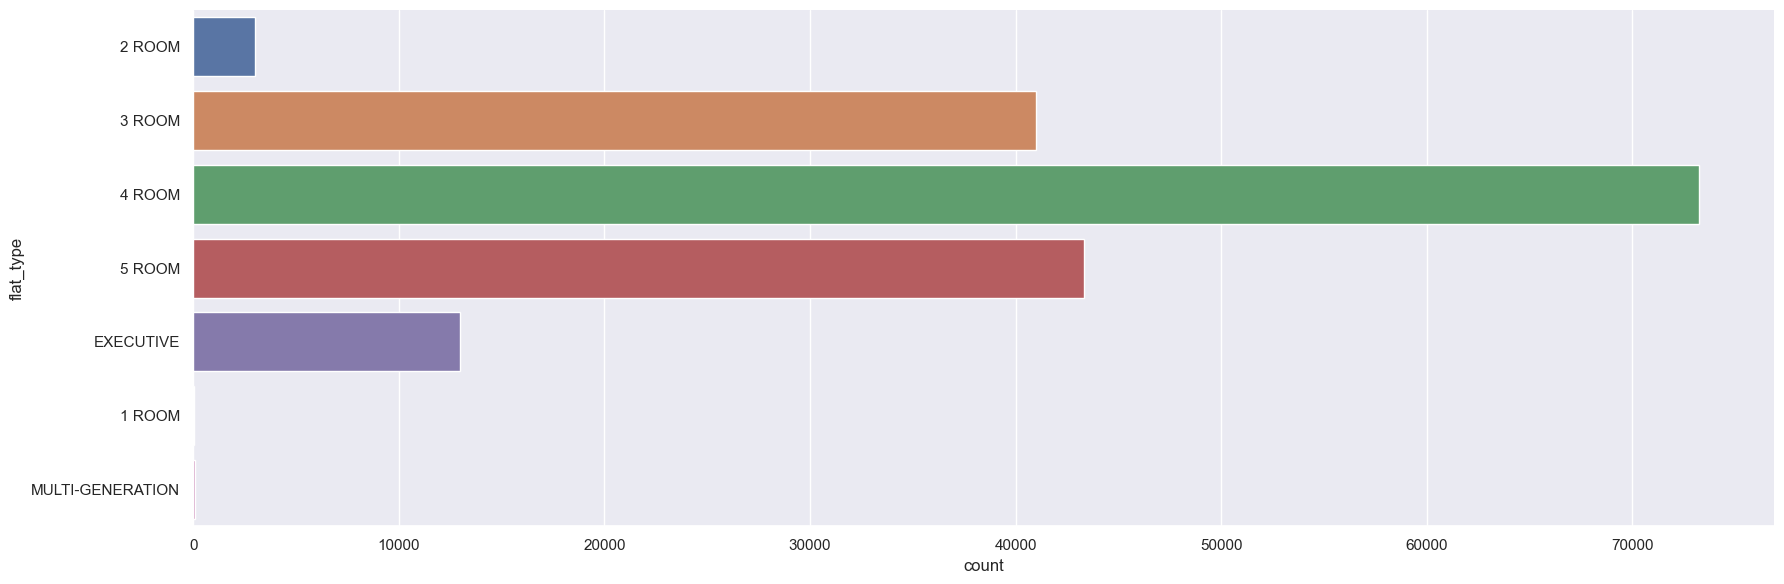

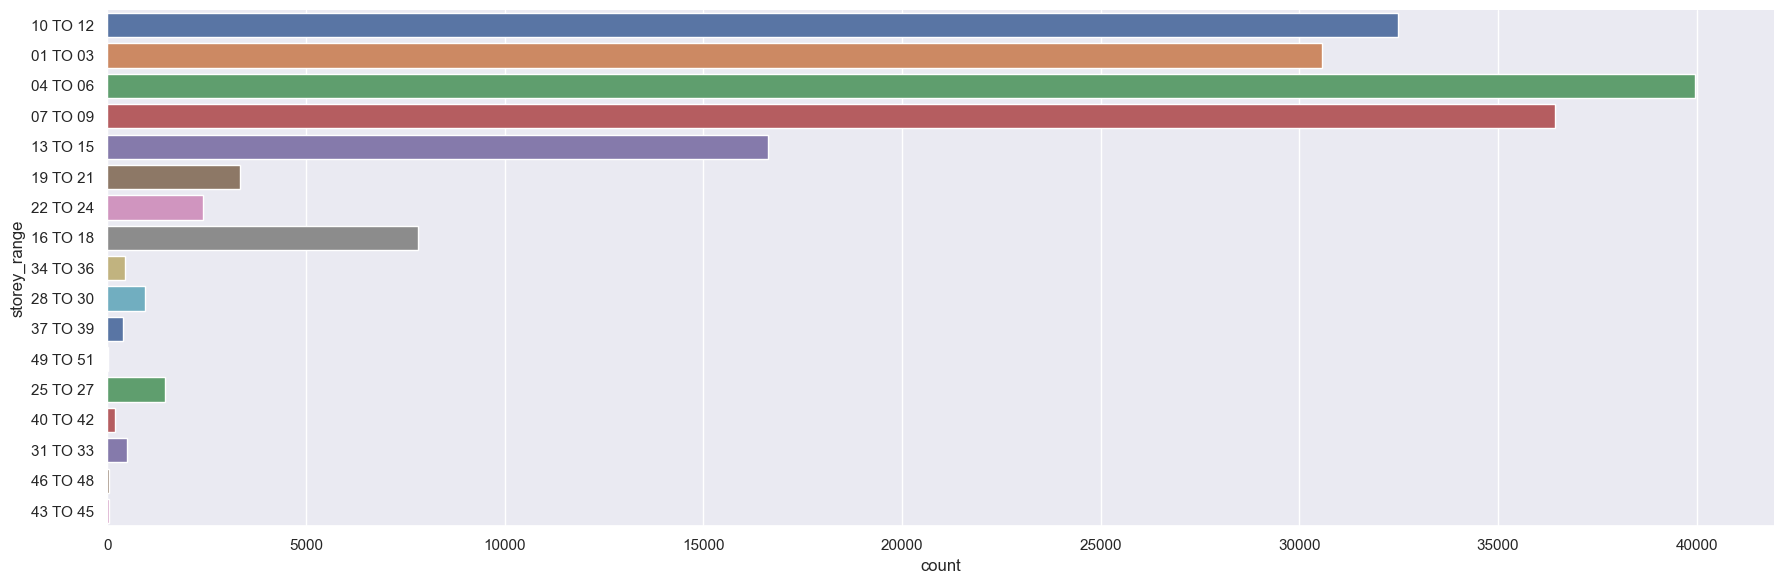

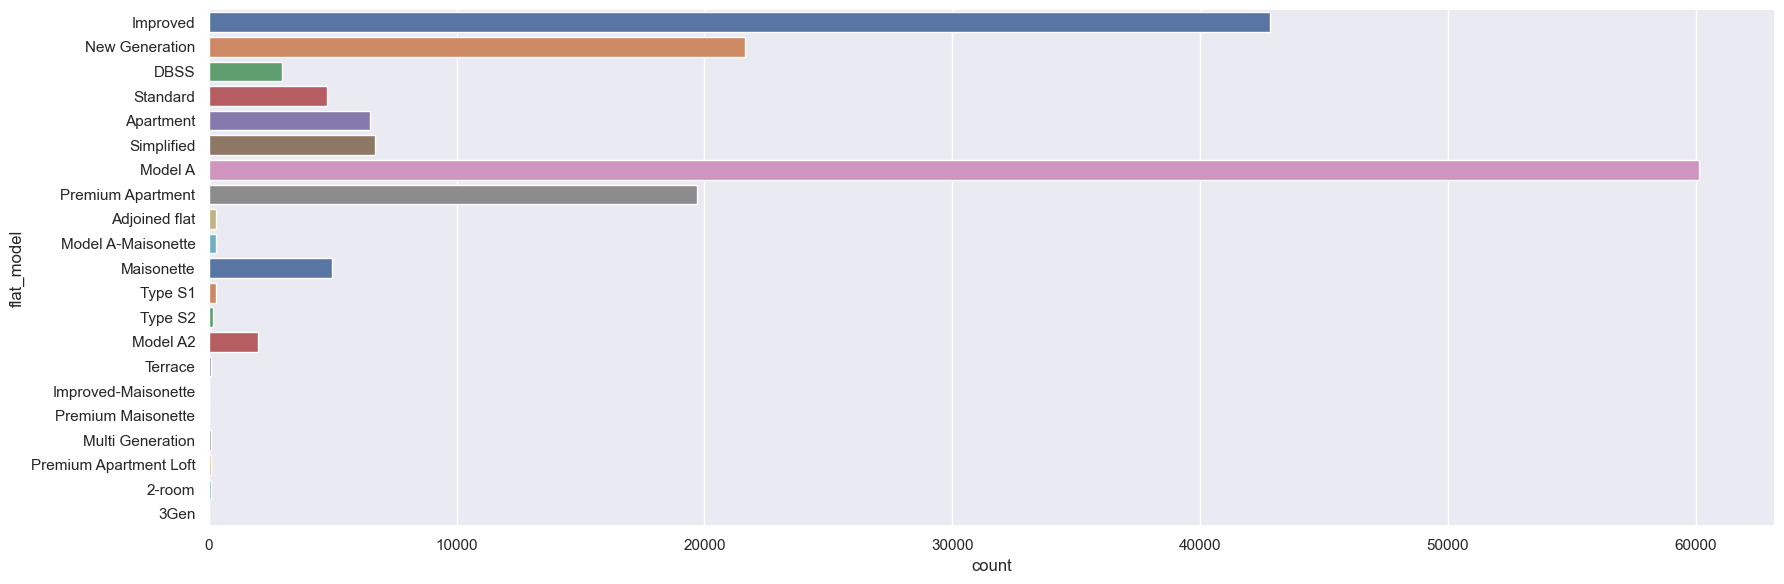

In [13]:
# For loop displaying catplots for each column in catData
for i in catData:
    sb.catplot(y = i, data = catData, kind = 'count', height = 6, aspect = 3, palette = 'deep')

In [14]:
# Append resale_price column from numData to new dataframe to be used for plotting catplots
catplotData = pd.concat([catData, numData['resale_price']], axis=1)

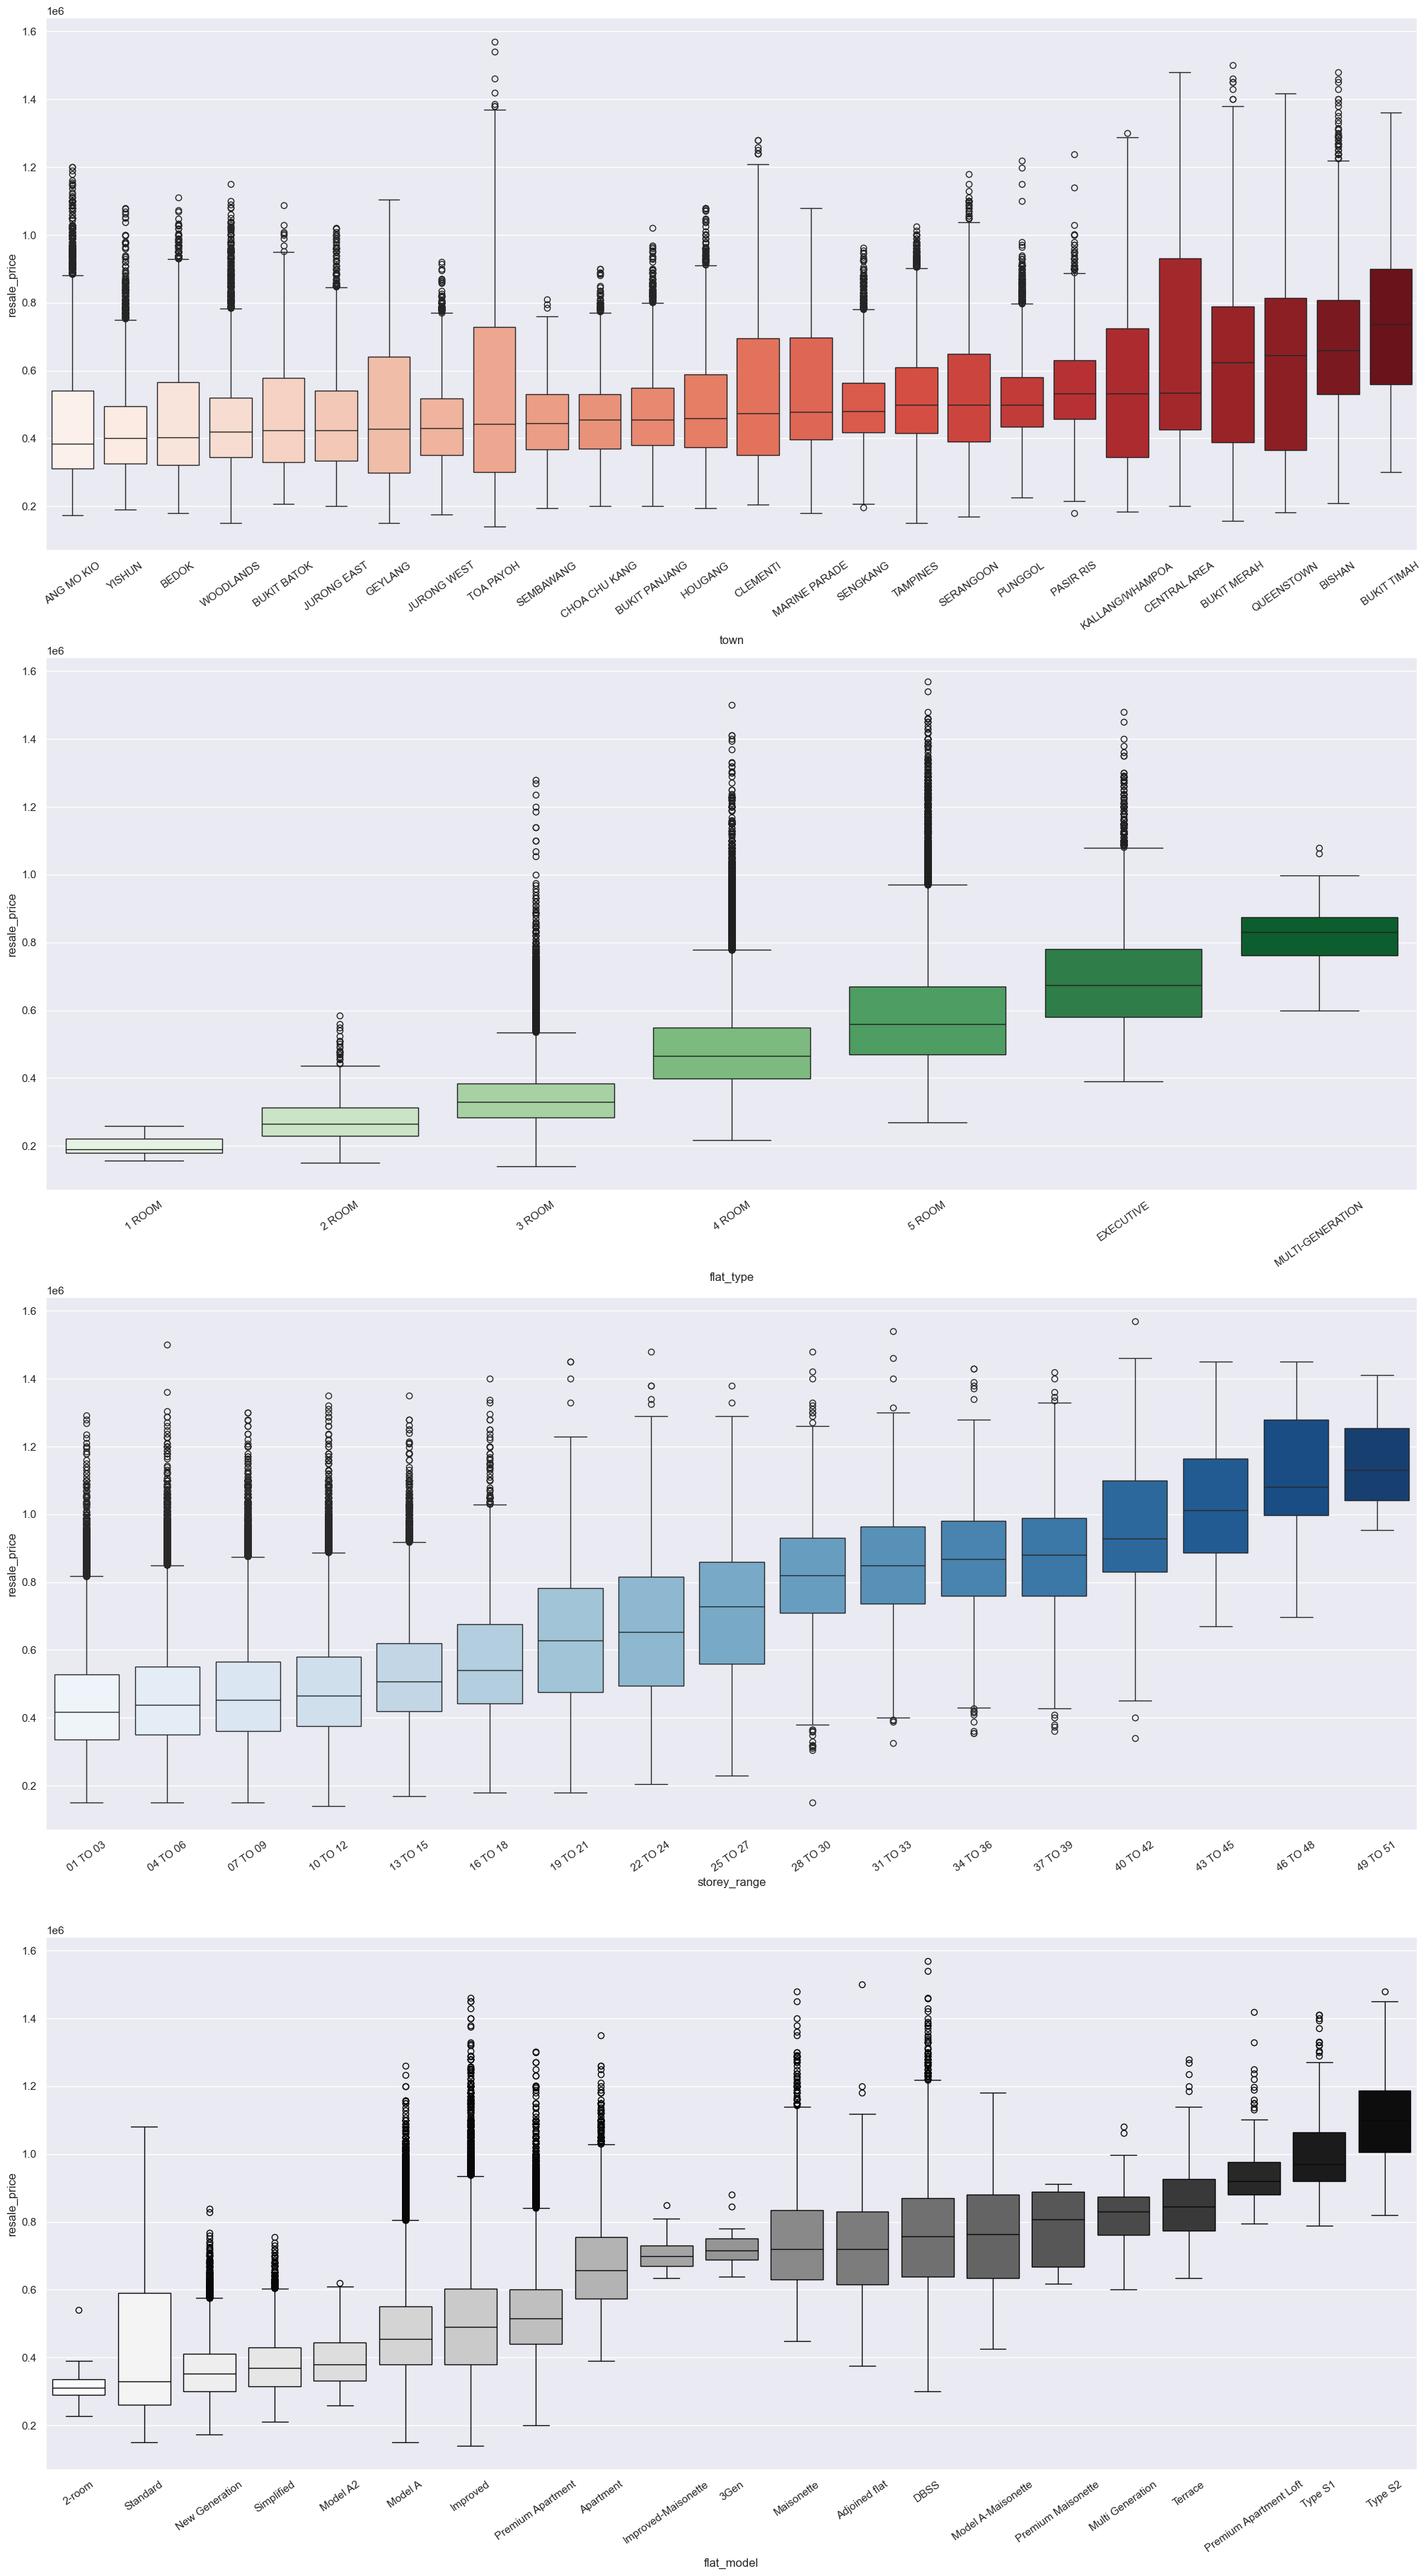

In [15]:
f, axes = plt.subplots(4, 1, figsize = (25,45))
palettes = ['Reds', 'Greens', 'Blues', 'Greys']

# Arrange variables in ascending order of median
for i, column in enumerate(catplotData.columns[:-1]): # Exclude last column: resale_price
    median = catplotData.groupby(by=column)['resale_price'].median().sort_values().index 
    sb.boxplot(x = column, y = 'resale_price', data = catplotData, order = median, palette = palettes[i], ax = axes[i])
    plt.sca(axes[i])
    plt.xticks(rotation=35)

### Observations

All 4 categorical variables are important in the prediction of resale price given the variation across each category within the variable. This suggests that the categorical variables cannot be omitted in the machine learning techniques used to create a model for prediction of resale price.

## 3) Machine Learning Techniques

In this section, we will be exploring the machine learning techniques that can be applied to the dataset, and deducing the optimal model based on R2 values.

### Univariate Linear Regression
The following code block includes a function which will be used for linear regression of `resale_price` against the two numerical predictors.

In [16]:
# Import relevant libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create function for univariate regression
def univar_reg(predictors):
    y = resaleData[['resale_price']]
    x = predictors
    x_train, x_test, y_train , y_test = train_test_split(y, x, test_size = 300, random_state = 42) # uses random results but gives same output if code is rerun
    print("Train set: \t", y_train.shape, x_train.shape)
    print("Test set: \t", y_test.shape, x_test.shape)

    linreg = LinearRegression()
    linreg.fit(x_train,y_train)

    print('\n')
    print("Intercept: \t", linreg.intercept_)
    print("Coefficient: \t", linreg.coef_)
    print()

    y_train_pred = linreg.predict(x_train)
    y_test_pred = linreg.predict(x_test)

    f, axes = plt.subplots(1,2,figsize=(20,8))
    axes[0].scatter(y_train, y_train_pred, color = 'b')
    axes[0].plot(y_train, y_train, color = 'r', linewidth = 1)
    axes[0].set_xlabel("True values for Resale Price (train)")
    axes[0].set_ylabel("Predicted values for Resale price (train)")
    axes[1].scatter(y_test, y_test_pred, color = 'g')
    axes[1].plot(y_test, y_test, color = 'r', linewidth = 1)
    axes[1].set_xlabel("True values for Resale Price (test)")
    axes[1].set_ylabel("Predicted values for Resale price (test)")
    plt.show()

    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()

### Univariate Linear Regression (Floor Area)

Train set: 	 (173381, 1) (173381, 1)
Test set: 	 (300, 1) (300, 1)


Intercept: 	 [55.42397634]
Coefficient: 	 [[8.47207436e-05]]



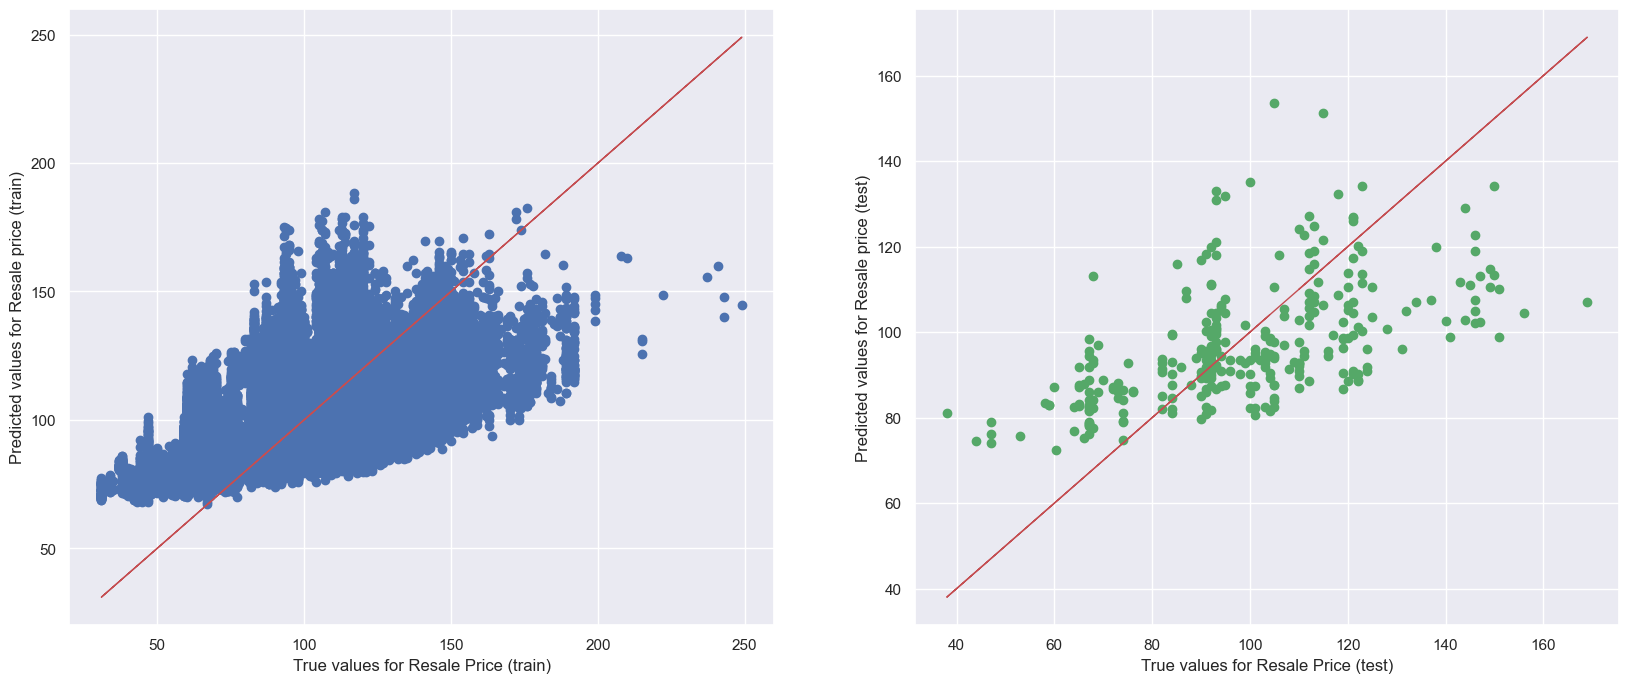

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3630293270872744
Mean Squared Error (MSE) 	: 367.6062268536494

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.31760450328718226
Mean Squared Error (MSE) 	: 370.86422011314744



In [17]:
# Create predictor variable
floor_area_sqm_reg = resaleData[['floor_area_sqm']]

# Apply to function
univar_reg(floor_area_sqm_reg)

### Univariate Linear Regression (Remaining lease in months)

Train set: 	 (173381, 1) (173381, 1)
Test set: 	 (300, 1) (300, 1)


Intercept: 	 [739.25299673]
Coefficient: 	 [[0.00031753]]



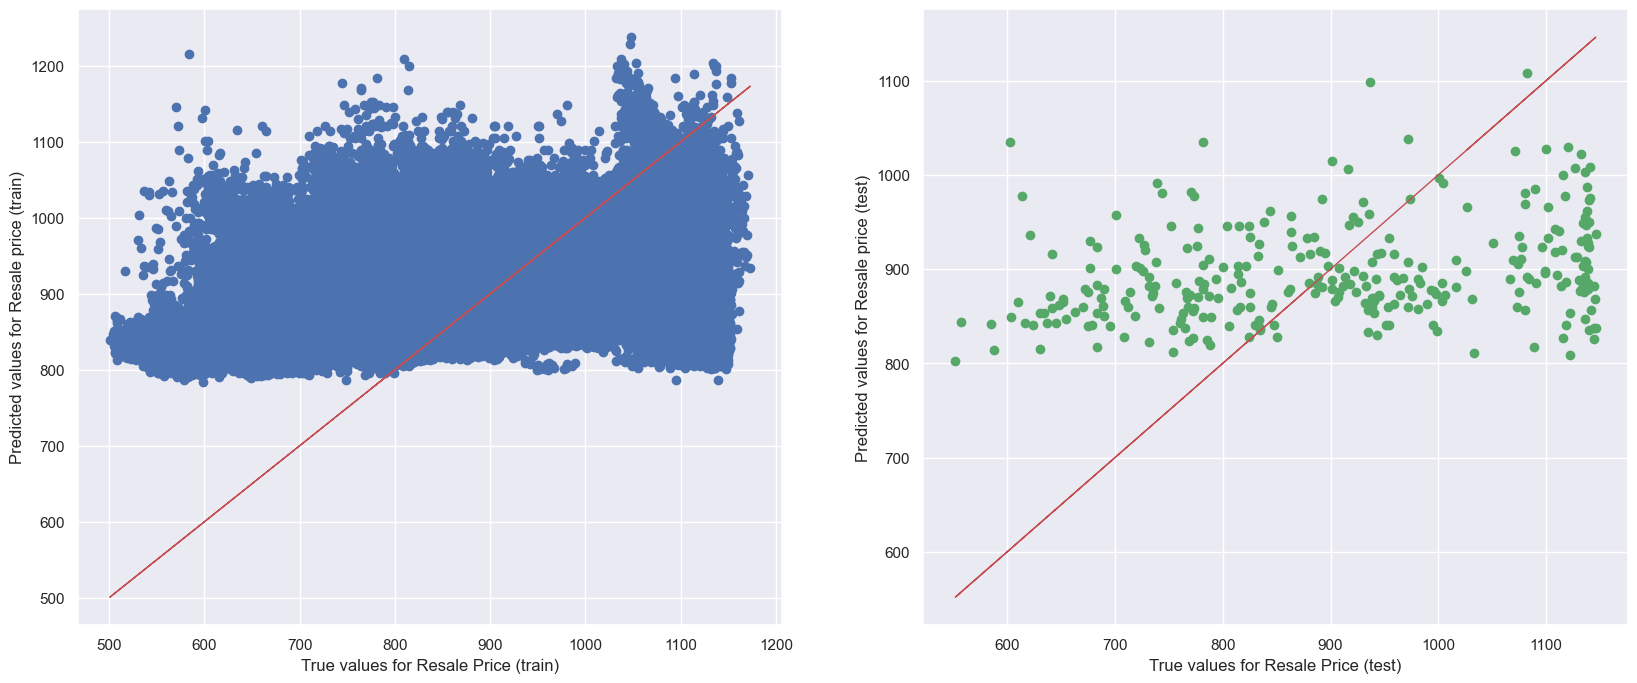

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.10591059792998081
Mean Squared Error (MSE) 	: 24844.56265201882

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.07869751020651661
Mean Squared Error (MSE) 	: 25509.93050301689



In [18]:
# Create predictor variable
remaining_lease_months_reg = resaleData[['remaining_lease_months']]

# Apply to function
univar_reg(remaining_lease_months_reg)

### Observations

Individual R2 values are low, with remaining lease being a worse indicator of resale price than floor area. Hence bivariate regression will only worsen the R2 value. Combining these findings with the previous observations in section 2) Overview of Data, it is clear that categorical variables contribute more to the prediction of resale price as compared to numerical variables.

## Further Refining of Dataset

From the above observations, it is clear that `remaining_lease_months` can be excluded in further analysis given the low R2 values.

In addition, we will be further narrowing our scope and removing columns:

- Only consider `flat_type` of '4 ROOM' and '5 ROOM' : John and Jane have the intention of long-term stay, needs space for children
- Removing `flat_model`: John and Jane are unlikely to be concerned about flat model
- Splitting `storey_range` to low, medium and high floors: Accounts for the `storey_range` variable in the analysis when linear regression is done for each of low, medium and high floors.

In [19]:
# Remove remaining_lease_months and flat_model
filtered1 = useful_data.drop(columns=['remaining_lease_months','flat_model'])

# Filtering only 4 and 5 room flats
desired_flat_types = ['4 ROOM', '5 ROOM']
filtered2 = filtered1[filtered1['flat_type'].isin(desired_flat_types)]

# Split data into low, medium and high storeys
low_storey_range = ['01 TO 03', '04 TO 06']
med_storey_range = ['07 TO 09', '10 TO 12', '13 TO 15', '16 TO 18', '19 TO 21']
high_storey_range = ['22 TO 24', '25 TO 27', '28 TO 30', '31 TO 33', '34 TO 36', '37 TO 39', '40 TO 42', '43 TO 45', '46 TO 48', '49 TO 51']

# Create variables for low, medium and high storeys
lowData = filtered2[filtered2['storey_range'].isin(low_storey_range)]
medData = filtered2[filtered2['storey_range'].isin(med_storey_range)]
highData = filtered2[filtered2['storey_range'].isin(high_storey_range)]
lowData.head()

,town,flat_type,storey_range,floor_area_sqm,resale_price
35,ANG MO KIO,4 ROOM,01 TO 03,94.0,403000.0
36,ANG MO KIO,4 ROOM,01 TO 03,92.0,410000.0
37,ANG MO KIO,4 ROOM,01 TO 03,98.0,425888.0
38,ANG MO KIO,4 ROOM,04 TO 06,97.0,430000.0
39,ANG MO KIO,4 ROOM,04 TO 06,92.0,435000.0


## Linear regression for each storey range

With each of `lowData`, `medData` and `highData` ready, we will now perform linear regression with a for loop for the 3 storey ranges we have previously defined.

Low Floors
Train set: 	 (857, 1) (857, 1)
Test set: 	 (215, 1) (215, 1)


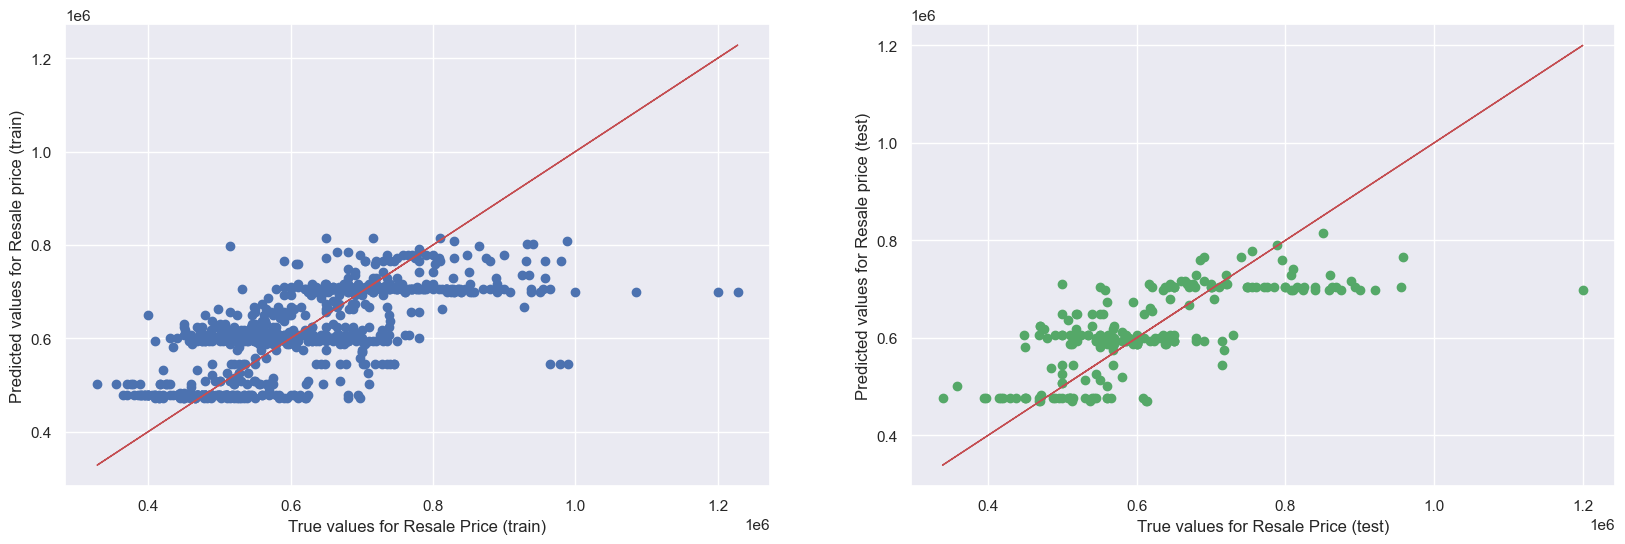

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4868196056625749
Mean Squared Error (MSE) 	: 8504586729.044287

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5180328097857234
Mean Squared Error (MSE) 	: 8071478004.509271




Medium Floors
Train set: 	 (1024, 1) (1024, 1)
Test set: 	 (257, 1) (257, 1)


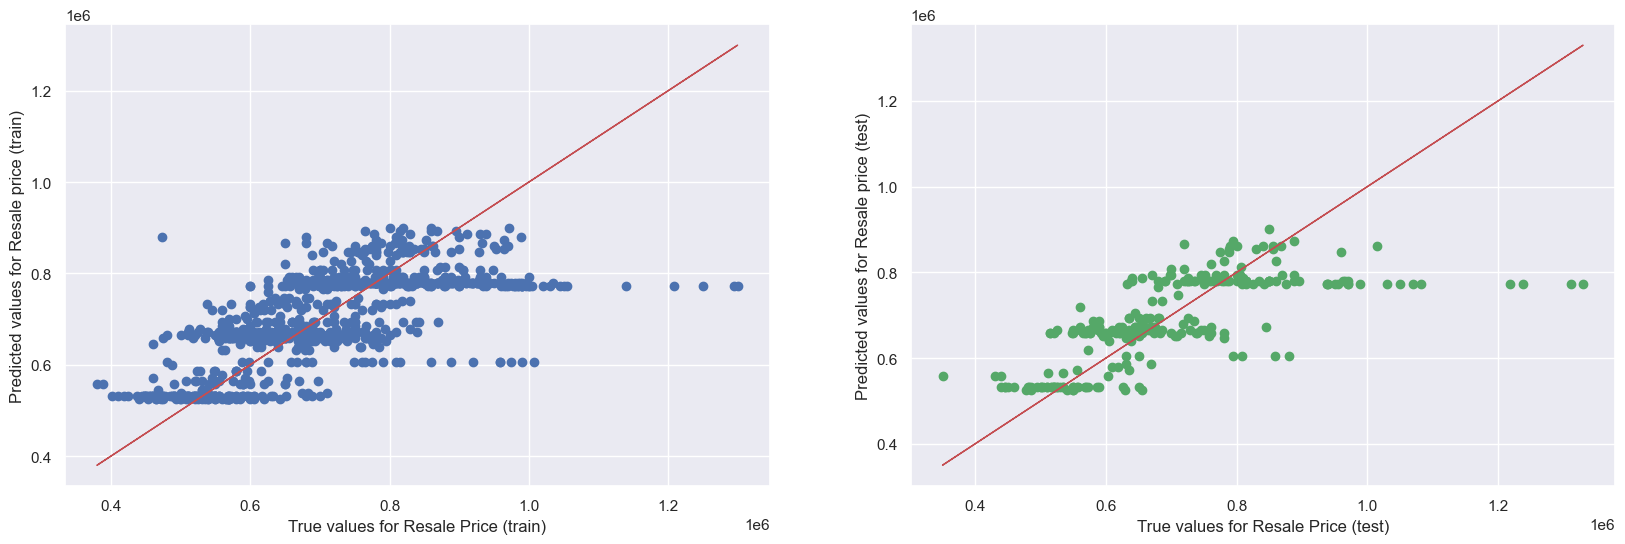

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5240392304321158
Mean Squared Error (MSE) 	: 9489178635.415424

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5018814574041985
Mean Squared Error (MSE) 	: 11833771032.665358




High Floors
Train set: 	 (114, 1) (114, 1)
Test set: 	 (29, 1) (29, 1)


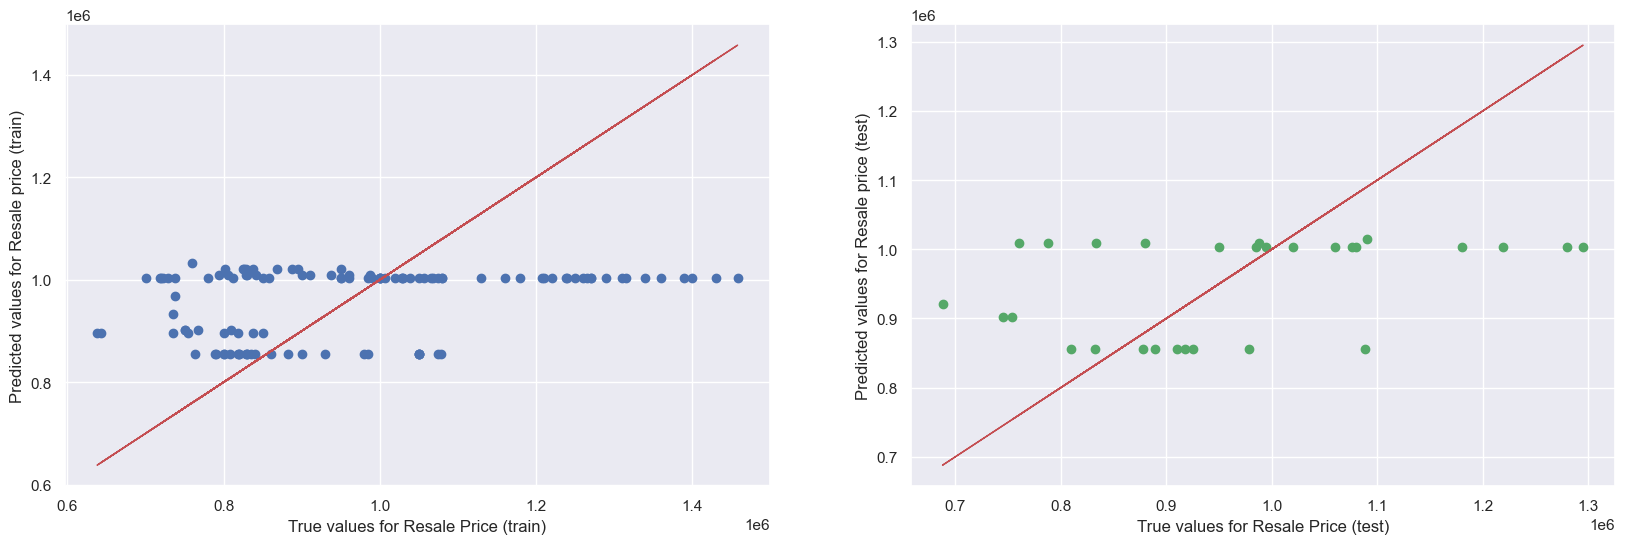

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.11723412473757233
Mean Squared Error (MSE) 	: 32809581173.980064

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.1537577049259755
Mean Squared Error (MSE) 	: 20970998597.564884






In [21]:
# Create a list of datasets to iterate over
iterate_Data = [lowData, medData, highData]

# Define a list of category names corresponding to each dataset
categories = ["Low Floors", "Medium Floors", "High Floors"]

# Built-in enumerate function allows both the index and the value of each dataset in iterate_Data to be accessed
for i, data in enumerate(iterate_Data):
    print(categories[i])
    
    # Filter only for town == 'BISHAN'
    bishan_data = data[data['town'] == 'BISHAN']
        
    # Perform operations only if there's data for Bishan
    # Linear Regression
    y = bishan_data[['resale_price']]
    x = bishan_data[['floor_area_sqm']]
    x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=42) # uses random results but gives same output if code is rerun
    
    print("Train set: \t", y_train.shape, x_train.shape)
    print("Test set: \t", y_test.shape, x_test.shape)

    linreg = LinearRegression()
    linreg.fit(x_train, y_train)

    y_train_pred = linreg.predict(x_train)
    y_test_pred = linreg.predict(x_test)

    f, axes = plt.subplots(1, 2, figsize=(20,6))
    axes[0].scatter(y_train, y_train_pred, color='b')
    axes[0].plot(y_train, y_train, color='r', linewidth=1)
    axes[0].set_xlabel("True values for Resale Price (train)")
    axes[0].set_ylabel("Predicted values for Resale price (train)")
    axes[1].scatter(y_test, y_test_pred, color='g')
    axes[1].plot(y_test, y_test, color='r', linewidth=1)
    axes[1].set_xlabel("True values for Resale Price (test)")
    axes[1].set_ylabel("Predicted values for Resale price (test)")
    plt.show()


    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()

    print('\n\n')

## Limitations and Recommendations

1. Renovation works were not accounted for
- Renovation works heavily influence a flat’s price because a well-renovated flat is likely to appeal to potential buyers.

2. Proximity to MRT stations was not considered
- 4-room flats located in the vicinity of an MRT station have resale prices “10% higher than those further away from the MRT station” [3]
- Flats nearer to MRT stations improve convenience for travel and are likely to be more sought after.

3. Lack of data points
- Only 114 data points used in the training set for regression, impacts reliability of prediction.
- Can add more data points upon each sale of resale flats to not only provide a better representation of the population of high-storey flats, but also reduce the variability and increase the accuracy of the prediction.

4. Inability to include categorical variables for regression
- Only 2 numerical variables in the dataset.
- Problem statement requires resale price as an output which is numerical.
- Of all machine learning techniques taught, only linear regression can be used in this context.
- However, linear regression allows only numerical variables, and since categorical variables are important as well, this limits effectiveness of our model
- Make use of one-hot encoding or random forest generators to directly include categorical data for future work.


[3]: https://www.propertyguru.com.sg/property-guides/hdb-near-mrt-how-much-more-56969

## Conclusion

In this project, we used linear regression to create models to predict the expected prices for flats in the Bishan area which fit John and Jane’s expectations, which aids in their assessment of whether a flat is worth buying. We have considered various factors in our analysis and narrowed down our variables to town, floor area and storey range. Given these variables, a predicted resale price can be produced using our model. The couple should refrain from purchasing a flat with prices that are higher than the predicted price and instead opt for those that are lower. 

Our models, though decently accurate, can be further improved. We have identified several key factors including renovation works, proximity to MRT stations, lack of data points and inability to include categorical data for regression, which should be worked on for future works.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0e37ed47-8f4f-4401-b325-cb67b2d2bfe6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>